<a href="https://colab.research.google.com/github/jimmy-pink/computer-science-manual/blob/main/Machine%20Learning/Coursera-Tensorflow-C3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ⚜️ 《C3 Natural Language Processing》

[Tensorflow Embedding Projector](https://projector.tensorflow.org/)   
[Tensorflow Datasets](https://www.tensorflow.org/datasets/catalog/overview)  
[Large Movie Review Dataset](https://ai.stanford.edu/~amaas/data/sentiment/)  

## 文本的情感

#### 基于单词的编码

给第一个单词一个编码  
```
I Love My Dog.
1 2    3  4
I Love My Cat.
1 2    3  5
==>
My Cat Love Me
3  5   2    6
```



### 标记化 Tokenization
在 TensorFlow NLP 中，单词或词汇通常会被转换成以下两种形式之一：  
	1.	词级 (Word-level) 编码
	•	每个单词被映射为一个唯一的整数 ID。
	•	示例：{"I": 1, "Love": 2, "My": 3, "Dog": 4, "Cat": 5}

	2.	子词级 (Subword-level) 编码（更推荐）
	•	句子被拆解成更小的子词单元（如 BERT 的 WordPiece、GPT 的 Byte-Pair Encoding 等）。   
文本示例： "unbelievably fast"   

| 编码等级 | 编码示例 |    
|:--------|:-------|  
| 词级 | unbelievably=100, fast = 101 |  
| 子词级 | un=1, believ=2, ably=3, fast=4 |  





In [ ]:
import tensorflow as tf

sentences = [
    'I love my dog',
    'I love my cat',
    'You love my dog!',
    'Do you think my dog is amazing?'
    ]

vectorize_layer = tf.keras.layers.TextVectorization()
vectorize_layer.adapt(sentences)
vocabulary = vectorize_layer.get_vocabulary()
print(vocabulary)
vocab = vectorize_layer.get_vocabulary(include_special_tokens=False)
print(vocab)

['', '[UNK]', 'my', 'love', 'dog', 'you', 'i', 'think', 'is', 'do', 'cat', 'amazing']
['my', 'love', 'dog', 'you', 'i', 'think', 'is', 'do', 'cat', 'amazing']


In [ ]:
# 将句子 矢量化 (将word集合 转为int 序列)
test_new_seq = vectorize_layer("I LOVE My Bird")
print(test_new_seq) ## 注意unknown word--bird，在seq将使用句子中没有出现过的token替换

# 矢量化数组
test_arr_seq = vectorize_layer(['I love my son', 'My Son Love Me'])
print(test_arr_seq)

# 矢量化为map
sentence_dataset = tf.data.Dataset.from_tensor_slices(sentences)
sequences = sentence_dataset.map(vectorize_layer)
for sentence, sequence in zip(sentences, sequences):
  print(f'{sentence} ---> {sequence}')

tf.Tensor([6 3 2 1], shape=(4,), dtype=int64)
tf.Tensor(
[[6 3 2 1]
 [2 1 3 1]], shape=(2, 4), dtype=int64)
I love my dog ---> [6 3 2 4]
I love my cat ---> [ 6  3  2 10]
You love my dog! ---> [5 3 2 4]
Do you think my dog is amazing? ---> [ 9  5  7  2  4  8 11]


In [ ]:
# 将句子对齐 (默认右对齐，左边补0)
sequences_pre = tf.keras.utils.pad_sequences(sequences=sequences)
print(sequences_pre)

# 示例右边补0，截断仅保留5位
sequences_post = tf.keras.utils.pad_sequences(sequences=sequences, padding='post', maxlen=5, truncating='post')
print(sequences_post)

[[ 0  0  0  6  3  2  4]
 [ 0  0  0  6  3  2 10]
 [ 0  0  0  5  3  2  4]
 [ 9  5  7  2  4  8 11]]
[[ 6  3  2  4  0]
 [ 6  3  2 10  0]
 [ 5  3  2  4  0]
 [ 9  5  7  2  4]]


## 词语嵌入 Word Embedding  

Word Embedding 是一种将单词转换为 稠密向量 (Dense
  Vector) 的方法。 它的目的是将语言数据转化为计算机可理解的数值形式， 同时保留单词的语义和语境。  

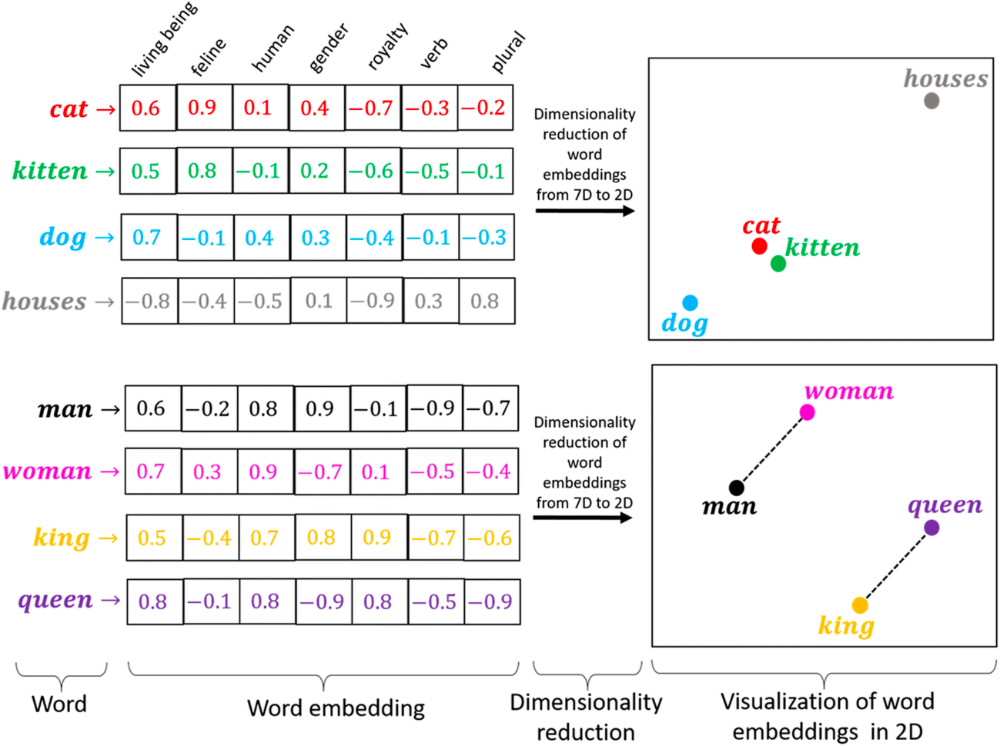

### **嵌入层 Embedding Layer**  

嵌入层 Embedding Layer 的作用，主要是将**离散的整数索引**(单词ID)，映射到 固定维度的**向量表示**(词向量)。(使文本就变成稠密的数值向量。)  
```embedding_layer = tf.keras.layers.Embedding(input_dim=VOCAB_SIZE, output_dim=EMBEDDING_DIM)```  
input_dim: 单词索引的数量，也就是有多少个惟一单词  
output_dim: 第个单词被映射的向量维度  



In [3]:
import tensorflow as tf
import numpy as np

VOCAB_SIZE = 10      # 词汇表大小（假设有 10 个惟一单词）
EMBEDDING_DIM = 3    # 每个单词映射到 3 维向量

embedding_layer = tf.keras.layers.Embedding(VOCAB_SIZE, EMBEDDING_DIM)

# 输入一个批次的句子（批量大小=2，序列长度=4）
input_data = np.array([
    [1, 2, 3, 4],  # "I Love My Dog"
    [3, 5, 2, 6]   # "My Cat Love Me"
])

# 通过嵌入层
output = embedding_layer(input_data)

print("输入 shape:", input_data.shape)    # (2, 4)
print("输出 shape:", output.shape)       # (2, 4, 3) -> 每个单词变成 3 维向量
print("输出数据:", output.numpy())       # 随机初始化的嵌入向量

输入 shape: (2, 4)
输出 shape: (2, 4, 3)
输出数据: [[[-0.0083224   0.00411193 -0.03849589]
  [-0.04206339  0.03271176 -0.01535357]
  [-0.01396907 -0.02724629  0.03780114]
  [-0.01961154  0.03724109  0.04713741]]

 [[-0.01396907 -0.02724629  0.03780114]
  [ 0.04473491  0.00957827 -0.02184257]
  [-0.04206339  0.03271176 -0.01535357]
  [ 0.00545299 -0.01805108 -0.00969309]]]


**测试 GlobalAveragePooling1D**  
全局平均池化层  
作用： **压缩时间步维度**，将一个**变长序列**（如文本）转换成**定长向量**，适用于分类任务。  
计算原理:
$$output = \frac{1}{T}\sum_{t=1}^T x_{t,f}$$
-	T = 4（时间步数，即单词数）
- f（每个单词的嵌入维度）

In [6]:
import tensorflow as tf
import numpy as np

# Initialize a 全局平均池化层 (GAP1D) layer
gap1d_layer = tf.keras.layers.GlobalAveragePooling1D()

sample_array = np.array([[[-0.0083224, 0.00411193, -0.03849589],  # I
                          [-0.04206339, 0.03271176, -0.01535357], # Love
                          [-0.01396907, -0.02724629, 0.03780114], # My
                          [-0.01961154, 0.03724109, 0.04713741]],# Dog

                         [[-0.01396907, -0.02724629, 0.03780114], # My
                          [0.04473491, 0.00957827, -0.02184257],  # Cat
                          [-0.04206339, 0.03271176, -0.01535357], # Love
                          [0.00545299, -0.01805108, -0.00969309]]]) # Me
# sample_array.shape.batch_size =2, 代表有2个 样本
# sample_array.shape.timesteps = 4, 代表三个时间步的数据
# sample_array.shape.features = 3, 代表特征有两个
print(f'shape of sample_array = {sample_array.shape}')
# print(f'sample array: {sample_array}')

# Pass the sample array to the GAP1D layer
output = gap1d_layer(sample_array)

# Print shape and contents of the GAP1D output array
print(f'output shape of gap1d_layer: {output.shape}')
print(f'output array of gap1d_layer: {output.numpy()}')

shape of sample_array = (2, 4, 3)
output shape of gap1d_layer: (2, 3)
output array of gap1d_layer: [[-0.0209916   0.01170462  0.00777227]
 [-0.00146114 -0.00075184 -0.00227202]]


**加载sarcasm.json 训练模型**

In [12]:
# 核心代码
import json
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import requests

# 加载新闻标题json数据文档
# .json内容示例：[{"article_link": "https://www.huffingtonpost.com/entry/versace-black-code_us_5861fbefe4b0de3a08f600d5", "headline": "former versace store clerk sues over secret 'black code' for minority shoppers", "is_sarcastic": 0},...更多]
url = "https://raw.githubusercontent.com/ashwaniYDV/sarcasm-detection-tensorflow/main/sarcasm.json"
response = requests.get(url)
datastore = response.json()

sentences = [] #标题集合
labels = [] #标签 0非讽刺的，1讽刺的
for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])
print("sentences length ", len(sentences))

# Number of examples to use for training
TRAINING_SIZE = 20000
# Vocabulary size of the tokenizer
VOCAB_SIZE = 10000
# Maximum length of the padded sequences
MAX_LENGTH = 32
# Output dimensions of the Embedding layer
EMBEDDING_DIM = 16

# Split the sentences: 前2万训练 后6.7千测试
train_sentences = sentences[0:TRAINING_SIZE]
test_sentences = sentences[TRAINING_SIZE:]
# Split the labels
train_labels = labels[0:TRAINING_SIZE]
test_labels = labels[TRAINING_SIZE:]

## max_tokens 最大惟一单词数量， 超出会优先取词频高的
## output_sequence_length 当vectorize_layer(sentence)方法调用时， 如果长度超出max_length  会截断只有max_len个单词
vectorize_layer = tf.keras.layers.TextVectorization(max_tokens=VOCAB_SIZE, output_sequence_length=MAX_LENGTH)
vectorize_layer.adapt(sentences)

# 矢量化语句集
train_sequences = vectorize_layer(train_sentences)
test_sequences = vectorize_layer(test_sentences)

# 将数据包装成 TensorFlow 数据集
train_dataset_vectorized = tf.data.Dataset.from_tensor_slices((train_sequences,train_labels))
test_dataset_vectorized = tf.data.Dataset.from_tensor_slices((test_sequences,test_labels))

for example,label in train_dataset_vectorized.take(1):
  print(example)
  print(f"Lable: {label.numpy()}")

SHUFFLE_BUFFER_SIZE = 1000
PREFETCH_BUFFER_SIZE = tf.data.AUTOTUNE
BATCH_SIZE = 32

# Optimize the datasets for training
train_dataset_final = (train_dataset_vectorized.cache().shuffle(SHUFFLE_BUFFER_SIZE).prefetch(PREFETCH_BUFFER_SIZE).batch(BATCH_SIZE))
test_dataset_final = (test_dataset_vectorized.cache().prefetch(PREFETCH_BUFFER_SIZE).batch(BATCH_SIZE))

model = tf.kears.Sequential([
    tf.keras.Input(shape = (MAX_LENGTH, )),
    tf.keras.layers.Embedding(VOCAB_SIZE, EMBEDDING_DIM),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])
model.compile(optimization="adam", loss="binary_crossentropy", metrics=['accuracy'])
model.fit(train_dataset_final, validation_data=test_dataset_final, epochs=10, verbose=2)


sentences length  26709
tf.Tensor(
[ 295    1  801 3788 2264   48  362   93 2225    6 2578 8719    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0], shape=(32,), dtype=int64)
Lable: 0


### 子词Tokenization
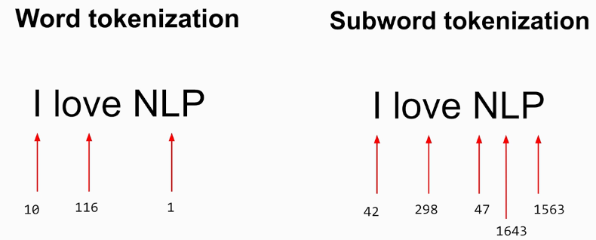

**测试WordPieceTokenizer**

In [14]:
import keras_nlp
import tensorflow as tf

train_sentences = [
    "You can compile your model as before and print out the summary with this code.",
    "This comes from China",
    "You need to maser this basic skill.",
    "There's a good chance that we're overfitting.",
    "TensorFlow makes it easy to create ML models that can run in any environment. ",
]
dataset = tf.data.Dataset.from_tensor_slices(train_sentences)
# 1. **手动创建词汇表**，使用 `keras_nlp.tokenizers.compute_word_piece_vocabulary`
vocab_list = keras_nlp.tokenizers.compute_word_piece_vocabulary(
    dataset,
    vocabulary_size=8000,  # 限制词汇表大小
    reserved_tokens=["[PAD]", "[UNK]", "[CLS]", "[SEP]", "[MASK]"]  # 预留特殊标记
)

# 2. **创建 WordPiece 分词器**
subword_tokenizer = keras_nlp.tokenizers.WordPieceTokenizer(
    vocabulary=vocab_list,
    lowercase=True  # 是否对文本转换为小写
)

# 3. **测试分词**
sample_string = "TensorFlow, from basic to mastery"
tokenized_string = subword_tokenizer.tokenize(sample_string)
print("Tokenized string:", tokenized_string)
tokens_as_words = [vocab_list[token_id] for token_id in tokenized_string]
print("Subwords corresponding to tokens:", tokens_as_words)

# 4. **反向解码**
original_string = subword_tokenizer.detokenize(tokenized_string)
print("Original string:", original_string)

Tokenized string: tf.Tensor(
[30 35 56 36 57 59 49 54 57 63  1 18 59 57 55 14 45 36 52 47 30 57 24 45
 36 60 35 59 64], shape=(29,), dtype=int32)
Subwords corresponding to tokens: ['t', '##e', '##n', '##s', '##o', '##r', '##f', '##l', '##o', '##w', '[UNK]', 'f', '##r', '##o', '##m', 'b', '##a', '##s', '##i', '##c', 't', '##o', 'm', '##a', '##s', '##t', '##e', '##r', '##y']
Original string: tensorflow [UNK] from basic to mastery


**加入子词Tokenization 训练模型**

In [16]:
import tensorflow_datasets as tfds
import tensorflow as tf
import keras_nlp

imdb, info = tfds.load("imdb_reviews", with_info=True, as_supervised=True, data_dir='./data',download=True)

train_reviews = imdb['train'].map(lambda review, label: review)
train_labels = imdb['train'].map(lambda review, label: label)

test_reviews = imdb['test'].map(lambda review, label: review)
test_labels = imdb['test'].map(lambda review, label: label)

VOCAB_SIZE = 10000
MAX_LENGTH = 120
PADDING_TYPE = 'pre'
TRUNC_TYPE = 'post'

vectorize_layer = tf.keras.layers.TextVectorization(
    max_tokens=VOCAB_SIZE
)
vectorize_layer.adapt(train_reviews)

def padding_func(sequences):

  # Put all elements in a single ragged batch
  sequences = sequences.ragged_batch(batch_size=sequences.cardinality())
  # Output a tensor from the single batch
  sequences = sequences.get_single_element()
  # Pad the sequences
  padded_sequences = tf.keras.utils.pad_sequences(sequences.numpy(),
                                                  maxlen=MAX_LENGTH,
                                                  truncating=TRUNC_TYPE,
                                                  padding=PADDING_TYPE
                                                 )

  return tf.data.Dataset.from_tensor_slices(padded_sequences)

vocab_list = keras_nlp.tokenizers.compute_word_piece_vocabulary(
    train_reviews,
    vocabulary_size=8000,
    reserved_tokens=["[PAD]", "[UNK]"]
)
subword_tokenizer = keras_nlp.tokenizers.WordPieceTokenizer(
    vocabulary=vocab_list
)

# 查看第1个元素的子词分词结果
sample_review = train_reviews.take(1).get_single_element()
tokenized_string = subword_tokenizer.tokenize(sample_review)
print ('Tokenized string is {}'.format(tokenized_string))

SHUFFLE_BUFFER_SIZE = 10000
PREFETCH_BUFFER_SIZE = tf.data.AUTOTUNE
BATCH_SIZE = 32

# Generate integer sequences using the subword tokenizer
train_sequences_subword = train_reviews.map(lambda review: subword_tokenizer.tokenize(review)).apply(padding_func)
test_sequences_subword = test_reviews.map(lambda review: subword_tokenizer.tokenize(review)).apply(padding_func)

# Combine the integer sequence and labels
train_dataset_vectorized = tf.data.Dataset.zip(train_sequences_subword,train_labels)
test_dataset_vectorized = tf.data.Dataset.zip(test_sequences_subword,test_labels)

# Optimize the datasets for training
train_dataset_final = (train_dataset_vectorized
                       .shuffle(SHUFFLE_BUFFER_SIZE)
                       .cache()
                       .prefetch(buffer_size=PREFETCH_BUFFER_SIZE)
                       .batch(BATCH_SIZE)
                       )

test_dataset_final = (test_dataset_vectorized
                      .cache()
                      .prefetch(buffer_size=PREFETCH_BUFFER_SIZE)
                      .batch(BATCH_SIZE)
                      )

model = tf.keras.Sequential([
    tf.keras.Input(shape=(MAX_LENGTH,)),
    tf.keras.layers.Embedding(subword_tokenizer.vocabulary_size(), EMBEDDING_DIM),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# .compile, .fit省略


Tokenized string is [ 209  175  195  674  630  178   15  680    8   85  189   77 2000  170
  192 1766 4426  203  700   42 1864 2116   15 1961  185  255  328   13
  182  173  392  535  189  231  442  390  170  740   15  597  231  255
  282  263  186 1680 6036  173  178    8   84  908 1045   15  209  178
  168  195  638 4963 1657 1422 3263  637   15  176  258 1648  312  234
  330  223  164   36 1532 5576  758  326 4207  174  234  415  231 3925
  180 4554  174   15 3651   36  363 6855 1985 2230 1828  303 1931 7070
   13  165  202 5417   14  298 2118  179 4426  175  353  182   66 1648
 1210   81 7017  170   66  178  172  175 5789  166  269  324 1606   15
   42  427  938  172  219  185  266  199  173   13 3231  204  471    8
   84  199 1766 4426    8   84  210  627   15   42  263 1575 1169  320
  171   15]


## 自然语言处理
